**Guide:**

https://www.kaggle.com/uysimty/get-start-image-classification?select=train.csv

Data link (from my google drive):

https://drive.google.com/file/d/1hSNOeZQPxKPAcMEHOMnQ91vX2v5qn-g8/view?usp=sharing


Download data and save it

In [1]:
url = 'https://drive.google.com/uc?id=1hSNOeZQPxKPAcMEHOMnQ91vX2v5qn-g8&export=download'

In [2]:
!gdown --id 1hSNOeZQPxKPAcMEHOMnQ91vX2v5qn-g8

Downloading...
From: https://drive.google.com/uc?id=1hSNOeZQPxKPAcMEHOMnQ91vX2v5qn-g8
To: /content/train.zip
8.99MB [00:00, 21.7MB/s]


Unzip and save into folder train_extracted

In [3]:
import zipfile
with zipfile.ZipFile("train.zip","r") as zip_ref:
    zip_ref.extractall("./train_extracted")

Disable warning

Import libs


In [4]:
# Disable warning
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.listdir("./train_extracted"))

['train.csv']


Code for fast run (25 epochs) or normal run (1 epoch)

In [5]:
FAST_RUN=False
batch_size=32
epochs=25
if FAST_RUN:
    epochs=1

Load the data into train_data

In [6]:
train_data = pd.read_csv("./train_extracted/train.csv")

**Data exploration**

In [7]:
print(train_data.columns) # columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


Show the images in the data set

In [8]:
# function to show images
def show_image(train_image, label, index):
    image_shaped = train_image.values.reshape(28,28) # reshape the image values into shape of (28,28)
    plt.subplot(3, 6, index+1) # 3 by 6, increment index
    plt.imshow(image_shaped, cmap=plt.cm.gray) # show image in gray
    plt.title(label) # image label

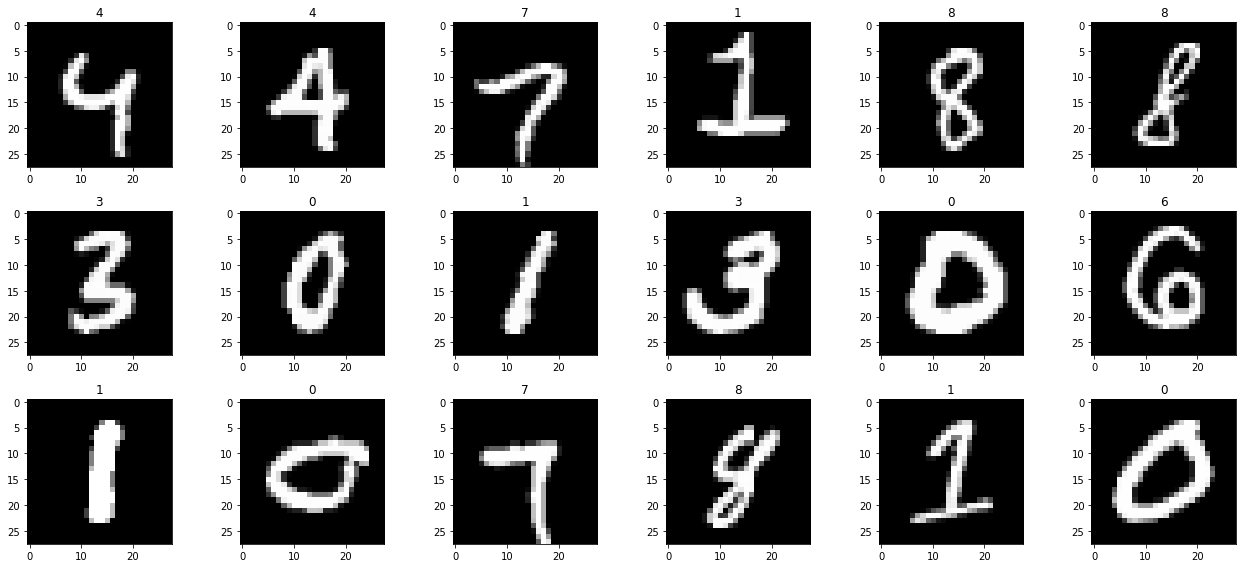

In [9]:
plt.figure(figsize=(18, 8)) # initialize size of figure that we will plot
sample_image = train_data.sample(18).reset_index(drop=True) # load the 1st 18 images 
for index, row in sample_image.iterrows():
    label = row['label']
    image_pixels = row.drop('label')
    show_image(image_pixels, label, index) # function to show images
plt.tight_layout() # showing in a tight layout

Understand the data set

In [10]:
print(len(train_data)) # number of rows
print(type(train_data)) # type

42000
<class 'pandas.core.frame.DataFrame'>


In [11]:
train_data.head() # 1st five entries

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


784 columns containing pixels 28*28, and 1 column containing label

In [12]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Basic stats

In [13]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Counting labels in the train data

In [14]:
label_counts = train_data.groupby('label').size()
print(label_counts)

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
dtype: int64


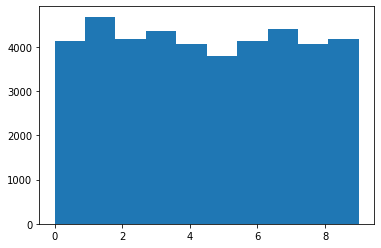

In [15]:
import matplotlib.pyplot as plt

labels = train_data['label']
plt.hist(labels, bins = 10)
plt.show()

It seems that the labels are well distributed

Let's check the images, one by one, for 1st 3

In [16]:
def plot_image(train_data, num):
  # Let's make some beautiful plots.
  digit_array = train_data.loc[num, "pixel0":]
  arr = np.array(digit_array) 

  #.reshape(a, (28,28))
  image_array = np.reshape(arr, (28,28))

  digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
  plt.colorbar(digit_img)
  print("IMAGE LABEL: {}".format(train_data.loc[num, "label"]))

IMAGE LABEL: 1


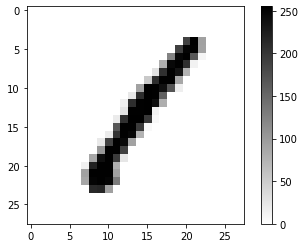

In [17]:
plot_image(train_data, 0)

IMAGE LABEL: 0


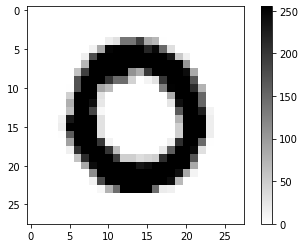

In [18]:
plot_image(train_data, 1)

IMAGE LABEL: 1


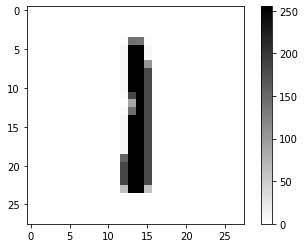

In [19]:
plot_image(train_data, 2)

**Let's shuffle the data**

In [20]:
train_data1 = train_data.sample(frac = 1).reset_index(drop=True)
print(train_data1)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          0       0       0       0  ...         0         0         0         0
1          7       0       0       0  ...         0         0         0         0
2          3       0       0       0  ...         0         0         0         0
3          9       0       0       0  ...         0         0         0         0
4          1       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      9       0       0       0  ...         0         0         0         0
41997      3       0       0       0  ...         0         0         0         0
41998      0       0       0       0  ...         0         0         0         0
41999      5       0       0       0  ...         0         0         0         0

[42000 rows x 7

**Now, separate it into our train set and final test**

**21K rows for train and 21K rows for test**

In [21]:
train1 = train_data1[:21000]
print(train1)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          0       0       0       0  ...         0         0         0         0
1          7       0       0       0  ...         0         0         0         0
2          3       0       0       0  ...         0         0         0         0
3          9       0       0       0  ...         0         0         0         0
4          1       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
20995      9       0       0       0  ...         0         0         0         0
20996      2       0       0       0  ...         0         0         0         0
20997      3       0       0       0  ...         0         0         0         0
20998      4       0       0       0  ...         0         0         0         0
20999      7       0       0       0  ...         0         0         0         0

[21000 rows x 7

In [22]:
test1 = train_data1[21000:].reset_index(drop=True)
print(test1)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          9       0       0       0  ...         0         0         0         0
1          2       0       0       0  ...         0         0         0         0
2          5       0       0       0  ...         0         0         0         0
3          7       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
20995      0       0       0       0  ...         0         0         0         0
20996      9       0       0       0  ...         0         0         0         0
20997      3       0       0       0  ...         0         0         0         0
20998      0       0       0       0  ...         0         0         0         0
20999      5       0       0       0  ...         0         0         0         0

[21000 rows x 7

Now we have large enough train and test sets

**Data preparation for training**

Split our train1 into train and validation (simple test) for model 

In [23]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x = train1.drop(columns=['label']).values.reshape(train1.shape[0],28,28,1)
y = to_categorical(train1['label'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

**Augment the train and test data, to ensure that model does not generalize.**

This way, model will learn the tough features. These features can be easily applied into new situations

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_datagen.fit(x_train)
train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
train_datagen.fit(x_test)
validation_generator = validation_datagen.flow(
    x_test,
    y_test
    
)

**Build CNN model achitecture**

A guide on how CNN models work:

https://www.coursera.org/lecture/building-deep-learning-models-with-tensorflow/convolutional-neural-networks-cnns-architecture-LS64o?utm_source=link&utm_medium=page_share&utm_content=vlp&utm_campaign=top_button


In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                46090     
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
_________________________________________________________________


Compile model

In [27]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Callbacks

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

Fit model

In [32]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=len(x_train) // batch_size, 
    validation_data=validation_generator,
    validation_steps=len(x_test) // batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/25
588/590 [============================>.] - ETA: 0s - loss: 0.0751 - accuracy: 0.9788
Epoch 00001: val_loss improved from inf to 0.03808, saving model to model.h5
590/590 [==============================] - 6s 11ms/step - loss: 0.0750 - accuracy: 0.9789 - val_loss: 0.0381 - val_accuracy: 0.9880
Epoch 2/25
588/590 [============================>.] - ETA: 0s - loss: 0.0685 - accuracy: 0.9790
Epoch 00002: val_loss improved from 0.03808 to 0.03749, saving model to model.h5
590/590 [==============================] - 7s 11ms/step - loss: 0.0685 - accuracy: 0.9791 - val_loss: 0.0375 - val_accuracy: 0.9880
Epoch 3/25
587/590 [============================>.] - ETA: 0s - loss: 0.0721 - accuracy: 0.9790
Epoch 00003: val_loss improved from 0.03749 to 0.03628, saving model to model.h5
590/590 [==============================] - 6s 11ms/step - loss: 0.0719 - accuracy: 0.9790 - val_loss: 0.0363 - val_accuracy: 0.9880
Epoch 4/25
589/590 [============================>.] - ETA: 0s - loss: 0.0688 

Visualize Training

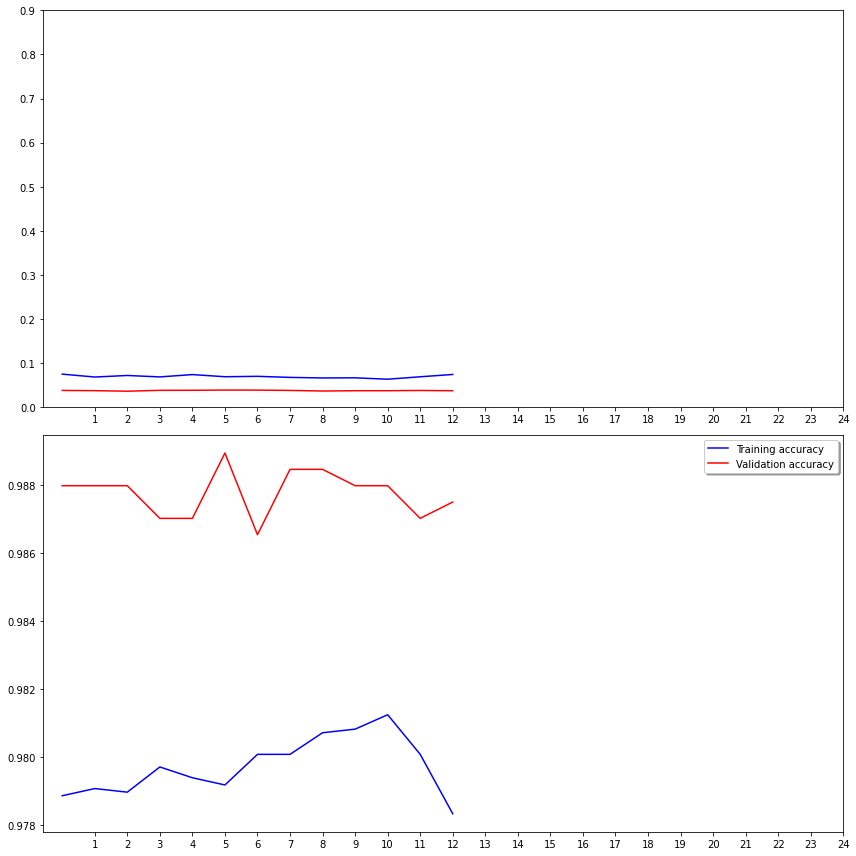

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Save model

In [34]:
model.save_weights("model_MNIST.h5")
from google.colab import files
files.download('model_MNIST.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluate model

In [35]:
x_test_recaled = (x_test.astype("float32") / 255)
scores = model.evaluate(x_test_recaled, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

accuracy: 98.76%
loss: 3.73%


Prediction

In [36]:
x_fin_test = test1.drop(columns=['label']).values.reshape(test1.shape[0],28,28,1)
y_fin_test = test1['label'].to_numpy()
predictions = model.predict(x_fin_test)
results = np.argmax(predictions, axis = 1) 

In [37]:
print(results)

[8 2 5 ... 3 0 5]


In [38]:
print(len(results))

21000


In [39]:
print(y_fin_test)

[9 2 5 ... 3 0 5]


In [40]:
y_pred = results
y_true = y_fin_test

In [41]:
from sklearn.metrics import accuracy_score
print("Accuracy score in percentage: ", accuracy_score(y_true, y_pred, "%"))
print("Accuracy in numbers: ", accuracy_score(y_true, y_pred, normalize=False), " out of ", str(21000))

Accuracy score in percentage:  0.9550952380952381
Accuracy in numbers:  20057  out of  21000


In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[2027    0    0    0    1    0   13    0   32    0]
 [   1 2315   15    0    8    0    4    2   35    0]
 [   8    2 2040    0    9    0    1    6   40    0]
 [   4    2   29 2101    0    7    0   21   54    6]
 [   0    2    1    0 2037    0   12    1   44    3]
 [   4    2    0    5    3 1797    9    0   93   10]
 [   3    0    0    0    1    0 1981    0   40    0]
 [   2    3    9    1   16    0    0 2035   42    5]
 [   6    0    0    0    1    0    1    1 1953    1]
 [  20    2    1    1   46    2    3    5  242 1771]]


In [43]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_true, y_pred))

0.9500982900899264


In [44]:
from sklearn.metrics import classification_report # for multilabel classification, gives precision, recall, f score, support, more
target_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=target_names))

Classification Report:
               precision    recall  f1-score   support

          c0       0.98      0.98      0.98      2073
          c1       0.99      0.97      0.98      2380
          c2       0.97      0.97      0.97      2106
          c3       1.00      0.94      0.97      2224
          c4       0.96      0.97      0.96      2100
          c5       1.00      0.93      0.96      1923
          c6       0.98      0.98      0.98      2025
          c7       0.98      0.96      0.97      2113
          c8       0.76      0.99      0.86      1963
          c9       0.99      0.85      0.91      2093

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



See our prediction

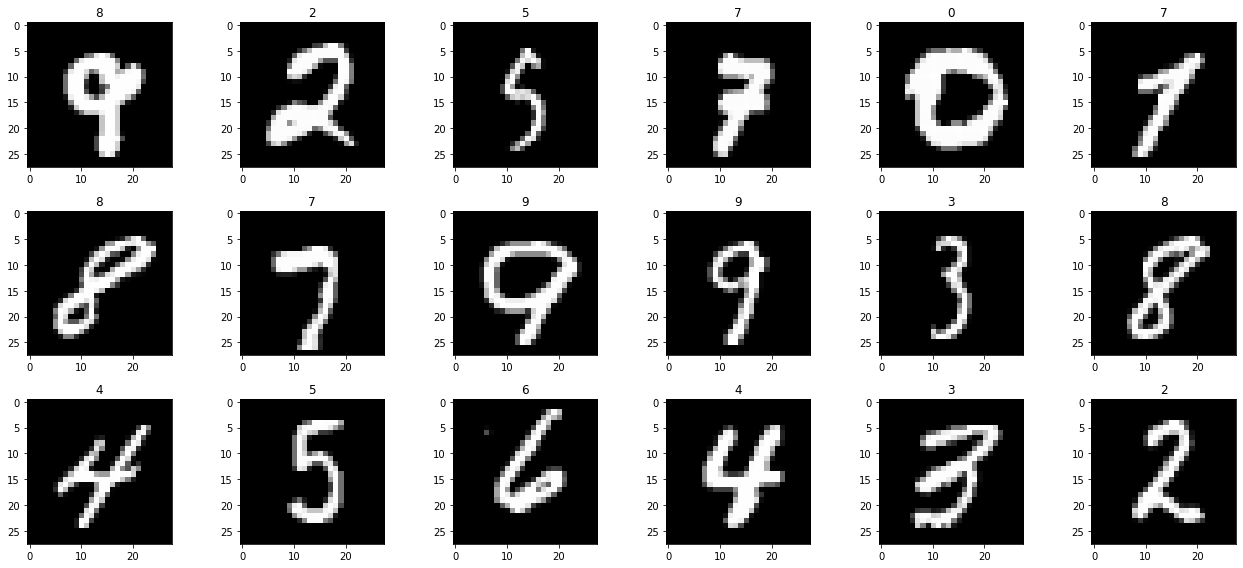

In [45]:
plt.figure(figsize=(18, 8))
sample_test = test1.drop(columns=['label']).head(18)
for index, image_pixels in sample_test.iterrows():
    label = results[index]
    show_image(image_pixels, label, index)
plt.tight_layout()